In [101]:
%tensorflow_version 1.14
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from keras.callbacks import TensorBoard

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


Using TensorFlow backend.


In [67]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
sentences1 = df['review'].values

y = df['label'].values

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
sentences

array(["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
       "This is an example of why the majority of action films are the same. Generic and 

tokenizing data

In [0]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

getting the vocabulary of data


In [0]:
sentences = tokenizer.texts_to_matrix(sentences)

In [70]:
import numpy as np
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:])
print(input_dim)
y_train


2000


**1st Question Find out mistakes**

Erros that i have faces are<br>
1.Tensorflow version error<br>
2.Input_dimension in our case it is 2000<br>
3.Neuron in the last layer is 3 because we have 3 for prediction(pos,neg,unsup)<br>
4.activation function i have used softmax as it is giving better accuracy<br>
As far i have learned softmax gives good accuracy then other activation functions  

In [0]:
model = Sequential()
model.add(layers.Dense(512, activation='relu',input_dim=input_dim))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [77]:
hist=model.fit(X_train,y_train, epochs=5, verbose=1, batch_size=256, validation_data=(X_test,y_test))


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 5s 70us/sample - loss: 0.0944 - acc: 0.9899 - val_loss: 1.2552 - val_acc: 0.5022
Epoch 2/5
75000/75000 [==============================] - 5s 69us/sample - loss: 0.0714 - acc: 0.9921 - val_loss: 1.3020 - val_acc: 0.5090
Epoch 3/5
75000/75000 [==============================] - 5s 67us/sample - loss: 0.0643 - acc: 0.9923 - val_loss: 1.3504 - val_acc: 0.5126
Epoch 4/5
75000/75000 [==============================] - 5s 67us/sample - loss: 0.0598 - acc: 0.9925 - val_loss: 1.3936 - val_acc: 0.5108
Epoch 5/5
75000/75000 [==============================] - 5s 67us/sample - loss: 0.0566 - acc: 0.9925 - val_loss: 1.4170 - val_acc: 0.5038


**2nd Question adding embedded layer**

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_review_len= max([len(s.split()) for s in sentences1])
vocab_size= len(tokenizer.word_index)+1
sentences_pre = tokenizer.texts_to_sequences(sentences1)
padded_docs= pad_sequences(sentences_pre,maxlen=max_review_len)


In [0]:
#from keras.layers import Embedding
#model.add(Embedding(vocab_size, 50, input_length=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
temp_X=X_test
temp_y=y_test


In [17]:
len(padded_docs)
#max_review_len
#padded_docs.shape
#X_train.shape
#vocab_size


100000

In [0]:
#from tensorflow.keras.layers import Embedding
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300,input_dim=max_review_len, activation='relu'))
m.add(layers.Dense(3, activation='softmax'))
#m = Sequential()
#m.add(layers.Dense(512, activation='relu',input_shape=(max_review_len,)))
#m.add(Embedding(vocab_size, 50,input_length=len(padded_docs)))
#m.add(layers.Dense(512, activation='relu'))
#m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
#h=m.fit(X_train,y_train, epochs=5, verbose=1, batch_size=256, validation_data=(X_test,y_test))

In [108]:
m.fit(X_train,y_train,batch_size=256,epochs=5,verbose=1,validation_data=(X_test,y_test))

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 233s 3ms/sample - loss: 0.8886 - acc: 0.5116 - val_loss: 0.6730 - val_acc: 0.6254
Epoch 2/5
75000/75000 [==============================] - 228s 3ms/sample - loss: 0.7859 - acc: 0.5497 - val_loss: 0.5682 - val_acc: 0.7039
Epoch 3/5
75000/75000 [==============================] - 228s 3ms/sample - loss: 0.7294 - acc: 0.5977 - val_loss: 0.5154 - val_acc: 0.7777
Epoch 4/5
75000/75000 [==============================] - 229s 3ms/sample - loss: 0.6495 - acc: 0.6623 - val_loss: 0.4957 - val_acc: 0.7855
Epoch 5/5
75000/75000 [==============================] - 221s 3ms/sample - loss: 0.5317 - acc: 0.7464 - val_loss: 0.4182 - val_acc: 0.8173


**3rd Question training model on 20newsgroups dataset**


In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True)

In [0]:
sentences=newsgroups_train.data
y=newsgroups_train.target

In [0]:
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences_pre = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences_pre,maxlen=max_review_len)

In [57]:
max_review_len
y
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
max_review_len

11821

In [0]:
p = Sequential()
p.add(Embedding(vocab_size, 50, input_length=max_review_len))
p.add(Flatten())
p.add(layers.Dense(300,input_dim=max_review_len, activation='relu'))
p.add(layers.Dense(20, activation='softmax'))
p.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [60]:
h1=p.fit(X_train,y_train, epochs=5, verbose=1, batch_size=256, validation_data=(X_test,y_test))

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 132s 16ms/sample - loss: 12.3796 - acc: 0.0529 - val_loss: 3.0152 - val_acc: 0.0375
Epoch 2/5
8485/8485 [==============================] - 127s 15ms/sample - loss: 3.0063 - acc: 0.0500 - val_loss: 2.9939 - val_acc: 0.0559
Epoch 3/5
8485/8485 [==============================] - 127s 15ms/sample - loss: 2.9784 - acc: 0.0574 - val_loss: 3.0011 - val_acc: 0.0604
Epoch 4/5
8485/8485 [==============================] - 127s 15ms/sample - loss: 2.9676 - acc: 0.0673 - val_loss: 2.9778 - val_acc: 0.0633
Epoch 5/5
8485/8485 [==============================] - 132s 16ms/sample - loss: 2.9420 - acc: 0.0704 - val_loss: 2.9549 - val_acc: 0.0675


**4th Question Plot a graph for acc, val_acc, loss, val_loss for history model**

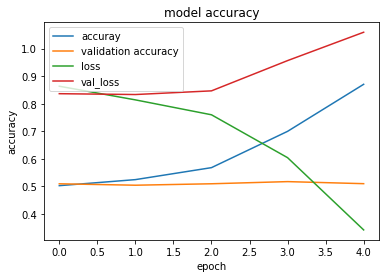

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

**`BONUS QUESTIONS**

 **1st Question Predicting over Sample data**

In [0]:
x=m.predict_classes(temp_X[[1],:])

In [107]:
print("ACTUAL",temp_y[1],"PREDICTION",x)

ACTUAL 2 PREDICTION [1]


**2nd Question TENSOR BOARD**

In [106]:
from time import time
tensorboard=TensorBoard(log_dir="/content/drive/My Drive/Colab Notebooks/logs/{}".format(time()))
m.fit(temp_X,temp_y,verbose=1,epochs=5,callbacks=[tensorboard])

Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 179s 7ms/sample - loss: 0.7605 - acc: 0.5623
Epoch 2/5
25000/25000 [==============================] - 179s 7ms/sample - loss: 0.5971 - acc: 0.6986
Epoch 3/5
25000/25000 [==============================] - 181s 7ms/sample - loss: 0.3430 - acc: 0.8555
Epoch 4/5
25000/25000 [==============================] - 178s 7ms/sample - loss: 0.1382 - acc: 0.9590
Epoch 5/5
25000/25000 [==============================] - 179s 7ms/sample - loss: 0.0571 - acc: 0.9923
